<a href="https://colab.research.google.com/github/ferdcoz/mcd-ast/blob/original/AST_Clase_3_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 3</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

# COMIENZA EJEMPLO

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings



from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

# **MODELO MA**

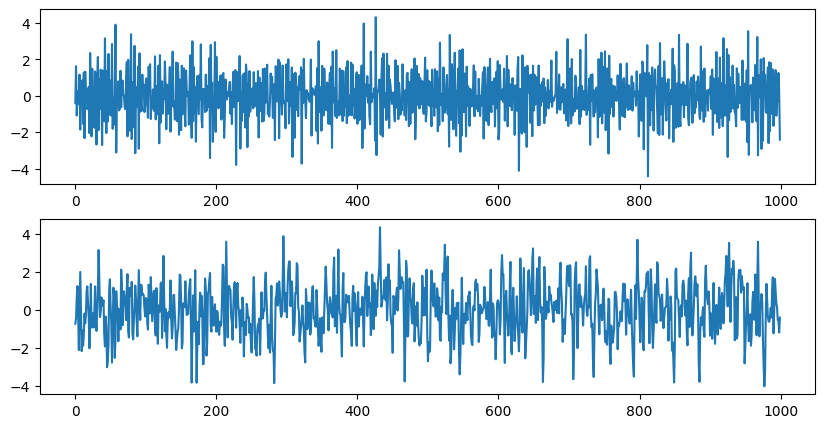

In [ ]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

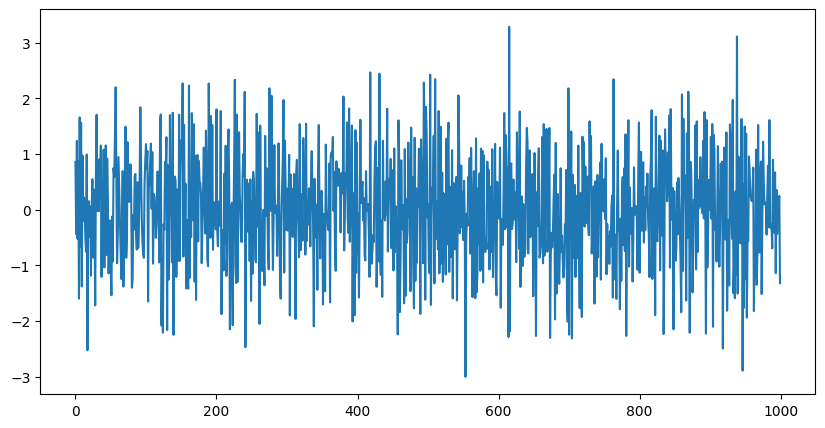

In [ ]:
# Grafico 3: MA parametro: -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

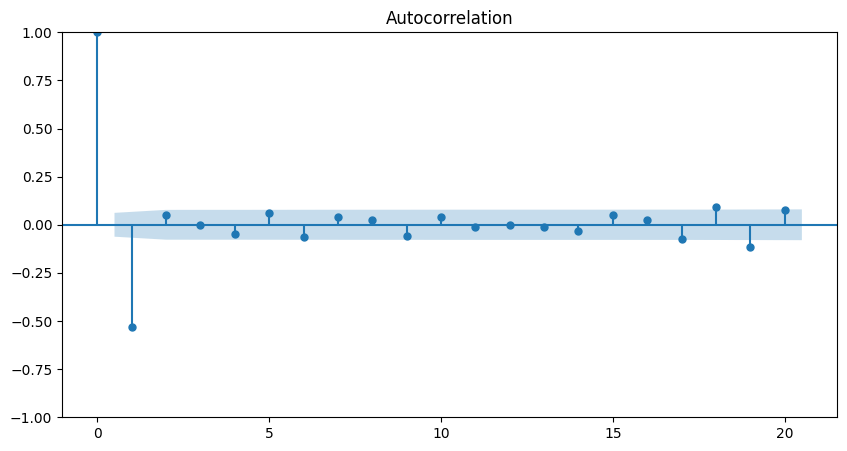

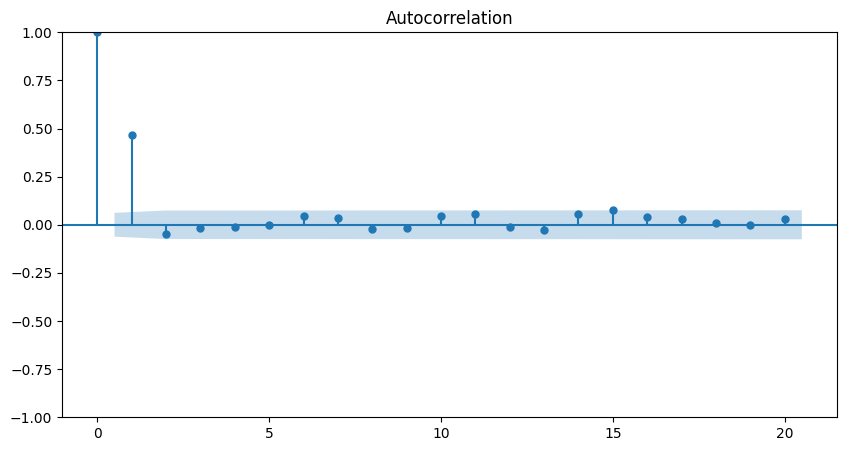

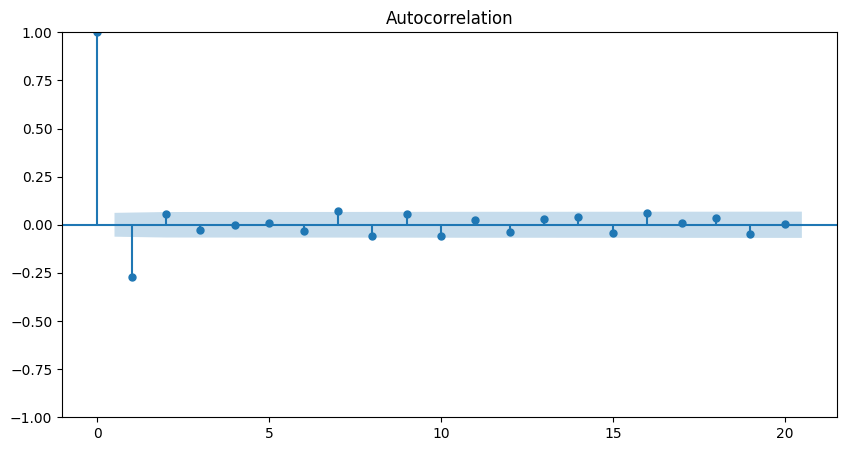

In [ ]:
# grafico ACF de los datos simulados 1:
plot_acf(datos_simulados_1, lags=20);

# grafico ACF de los datos simulados 2:
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3:
plot_acf(datos_simulados_3, lags=20);

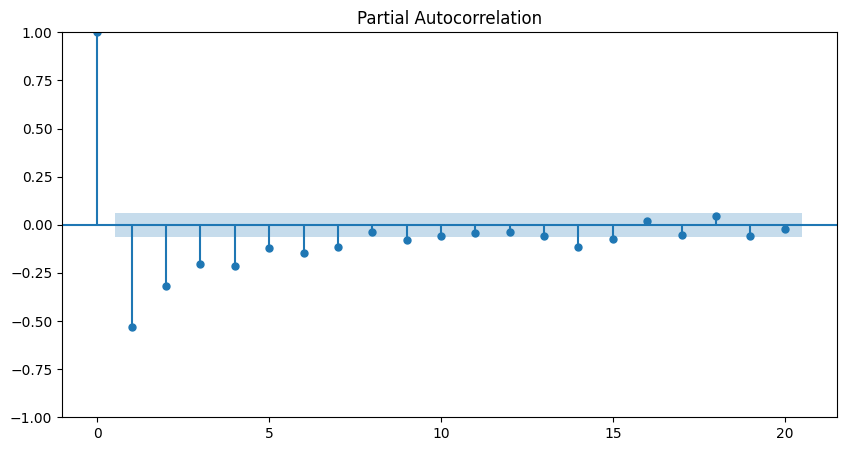

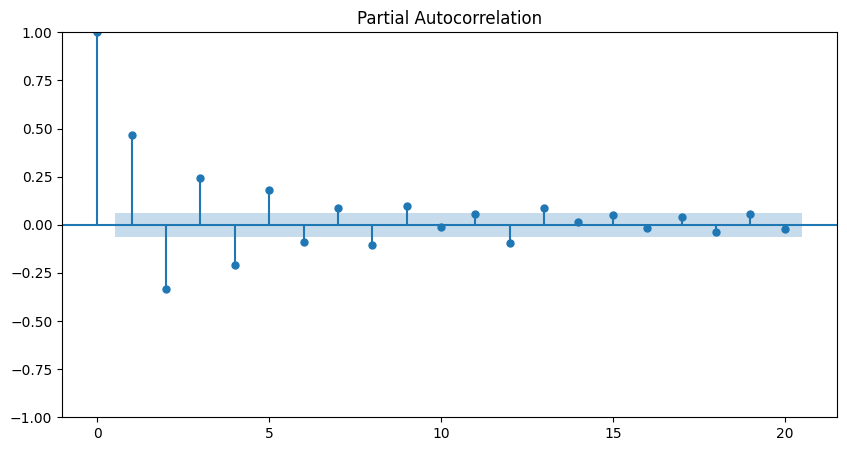

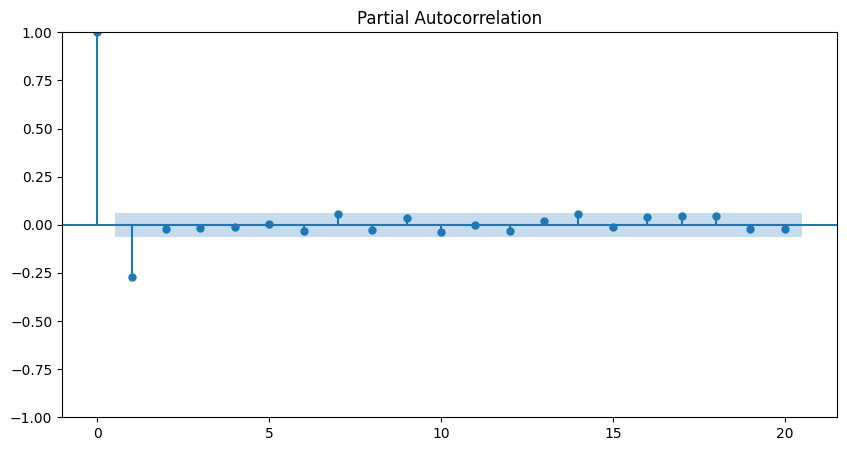

In [ ]:
# grafico PACF de los datos simulados 1:
plot_pacf(datos_simulados_1, lags=20);

# grafico PACF de los datos simulados 2:
plot_pacf(datos_simulados_2, lags=20);

# grafico PACF de los datos simulados 3:
plot_pacf(datos_simulados_3, lags=20);

*Aqui* vemos el modelo MA(1) de los simulados 1:

In [ ]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1411.206
Date:                Tue, 17 Oct 2023   AIC                           2828.413
Time:                        17:11:58   BIC                           2843.136
Sample:                             0   HQIC                          2834.008
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.003      1.530      0.126      -0.001       0.011
ma.L1         -0.9029      0.014    -66.136      0.000      -0.930      -0.876
sigma2         0.9830      0.045     21.930      0.000       0.895       1.071
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.62   Prob(JB):                         0.67
Heteroskedasticity (H):               0.92   Skew:                             0.06
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AUTO-ARIMA por libreria

In [ ]:
stepwise_fit = auto_arima(datos_simulados_1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2833.794, Time=1.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3435.412, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3105.843, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2828.413, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3433.418, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2830.114, Time=0.88 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2830.150, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2832.303, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2828.605, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 5.302 seconds


AUTO-ARIMA manual

In [ ]:
# Determinamos los parametros p, d y q
p = d = range(0, 3)
q = range(2)


# Combinacion de los diferentes pamatros para luego probar
pdq = list(itertools.product(p, d, q))


# Inicializa para el loop, con el primer modelo que genera

loopinicial = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,0))
loopinicialresult = loopinicial.fit()
RESULTADOAIC = loopinicialresult.aic

orden=[]

# Iniciamos el loop
for param in pdq:

  mod = ARIMA(datos_simulados_1, order=(param))
  results = mod.fit()

  if results.aic < RESULTADOAIC:
    RESULTADOAIC = results.aic
    orden = param

print(f"El mejor modelo es un ARIMA{orden}, arrojo el menor AIC de = {RESULTADOAIC  } ")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


El mejor modelo es un ARIMA(0, 0, 1), arrojo el menor AIC de = 2828.4126171161115 


# TRABAJAMOS CON LOS DATOS SIMULADOS DEL CASO 2

*Aqui* vemos el modelo MA(1) de los simulados 2:

In [ ]:
modelo2_A = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,1))
resultado2A = modelo2_A.fit()

resultado2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1442.578
Date:                Tue, 17 Oct 2023   AIC                           2891.157
Time:                        17:14:03   BIC                           2905.880
Sample:                             0   HQIC                          2896.752
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0302      0.062      0.492      0.623      -0.090       0.151
ma.L1          0.8935      0.015     61.310      0.000       0.865       0.922
sigma2         1.0467      0.046     22.556      0.000       0.956       1.138
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.28   Prob(JB):                         0.24
Heteroskedasticity (H):               0.98   Skew:                            -0.13
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1,12 y 13 de los simulados 2:

In [ ]:
modelo2_B = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,1,1)))
resultado2B = modelo2_B.fit()

resultado2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 12, 13])   Log Likelihood               -1442.145
Date:                      Tue, 17 Oct 2023   AIC                           2894.290
Time:                              17:14:24   BIC                           2918.828
Sample:                                   0   HQIC                          2903.616
                                     - 1000                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.060      0.511      0.609      -0.086       0.147
ma.L1          0.8929      0.015     58.742      0.000       0.863       0.923
ma.L12        -0.0297      0.032     -0.919      0.358      -0.093       0.034
ma.L13        -0.0296      0.031     -0.949      0.343      -0.091       0.032
sigma2         1.0458      0.046     22.507      0.000       0.955       1.137
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.30   Prob(JB):                         0.27
Heteroskedasticity (H):               0.98   Skew:                            -0.12
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1 y 13 de los simulados 2:

In [ ]:
modelo2_C = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,0,1)))
resultado2C = modelo2_C.fit()

resultado2C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 13])   Log Likelihood               -1442.550
Date:                  Tue, 17 Oct 2023   AIC                           2893.101
Time:                          17:14:33   BIC                           2912.732
Sample:                               0   HQIC                          2900.562
                                 - 1000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0302      0.062      0.491      0.623      -0.090       0.151
ma.L1          0.8943      0.015     60.317      0.000       0.865       0.923
ma.L13        -0.0030      0.014     -0.209      0.835      -0.031       0.025
sigma2         1.0467      0.047     22.480      0.000       0.955       1.138
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.27   Prob(JB):                         0.25
Heteroskedasticity (H):               0.98   Skew:                            -0.13
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2894.993, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3439.696, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3199.136, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2891.157, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3438.173, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2891.629, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2891.543, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2893.071, Time=1.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2889.400, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2889.892, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2889.809, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3197.299, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2891.353, Time=0.39 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 6.108 seconds


In [ ]:
AIC= [resultado2A.aic,resultado2B.aic,resultado2C.aic]
BIC= [resultado2A.bic,resultado2B.bic,resultado2C.aic]
HQIC= [resultado2A.hqic,resultado2B.hqic,resultado2C.aic]

In [ ]:
MODELOS = ('Lag 1', 'Lags 1, 12 y 13', 'Lags 1 y 13')
resumen2 = pd.DataFrame({'AIC':AIC, 'BIC': BIC,'HQIC':HQIC}, index=MODELOS)
resumen2.index.name = 'MODELOS'

resumen2.round(4)

,AIC,BIC,HQIC
MODELOS,,,
Lag 1,2891.1566,2905.8799,2896.7525
"Lags 1, 12 y 13",2894.2896,2918.8284,2903.6161
Lags 1 y 13,2893.1006,2893.1006,2893.1006


*Aqui* vemos el modelo MA(1) de los simulados 3:

In [ ]:
modelo3 = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,1))
resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1396.732
Date:                Tue, 17 Oct 2023   AIC                           2799.464
Time:                        17:15:32   BIC                           2814.188
Sample:                             0   HQIC                          2805.060
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.023      0.023      0.982      -0.044       0.045
ma.L1         -0.2650      0.029     -9.134      0.000      -0.322      -0.208
sigma2         0.9565      0.047     20.335      0.000       0.864       1.049
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.71   Prob(JB):                         0.08
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_3, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2802.826, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2870.969, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2797.612, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2799.464, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2868.969, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2799.222, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2799.164, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2800.882, Time=1.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2795.612, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2797.223, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2797.164, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2797.465, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2798.882, Time=0.72 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.781 seconds


FIN DEL CODIGO - GRACIAS